In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

In [9]:
dir_path='prepared_dataset'

#training dataset
x_train=np.load(os.path.join(dir_path,'train_images.npy'))
y_train=np.load(os.path.join(dir_path,'train_labels.npy'))

#cross validation dataset
x_cv=np.load(os.path.join(dir_path,'cross_validation_images.npy'))
y_cv=np.load(os.path.join(dir_path,'cross_validation_labels.npy'))

#test dataset
x_test=np.load(os.path.join(dir_path,'test_images.npy'))
y_test=np.load(os.path.join(dir_path,'test_labels.npy'))

In [10]:
y_train=np.expand_dims(y_train,axis=1)
y_cv=np.expand_dims(y_cv,axis=1)
y_test=np.expand_dims(y_test,axis=1)

In [11]:
print(f"shape of X_train,y_train = {x_train.shape},{y_train.shape} \n"+
      f"shape of X_cv,y_cv = {x_cv.shape},{y_cv.shape} \n"+
      f"shape of X_test,y_test = {x_test.shape},{y_test.shape}")

shape of X_train,y_train = (445, 278, 278, 3),(445, 1) 
shape of X_cv,y_cv = (56, 278, 278, 3),(56, 1) 
shape of X_test,y_test = (56, 278, 278, 3),(56, 1)


In [12]:
features=278*278*3

x_train_reshaped=x_train.reshape((445,features))
x_cv_reshaped=x_cv.reshape((56,features))
x_test_reshaped=x_test.reshape((56,features))

print("After reshaping : ")
print(f"shape of X_train,y_train = {x_train_reshaped.shape},{y_train.shape} \n"+
      f"shape of X_cv,y_cv = {x_cv_reshaped.shape},{y_cv.shape} \n"+
      f"shape of X_test,y_test = {x_test_reshaped.shape},{y_test.shape}")

After reshaping : 
shape of X_train,y_train = (445, 231852),(445, 1) 
shape of X_cv,y_cv = (56, 231852),(56, 1) 
shape of X_test,y_test = (56, 231852),(56, 1)


In [13]:
scaler=StandardScaler()
x_train_reshaped_scaled=scaler.fit_transform(x_train_reshaped)
x_cv_reshaped_scaled=scaler.transform(x_cv_reshaped)

In [14]:
def build_model():
    tf.random.set_seed(42)

    model_1 = Sequential([
        Dense(units=278, activation='relu', name='layer_1'),
        Dense(units=128, activation='relu', name='layer_2'),
        Dense(units=1, activation='linear', name='layer_3')
    ], name='model_1')

    model_2 = Sequential([
        Dense(units=640, activation='relu', name='layer_1'),
        Dense(units=325, activation='relu', name='layer_2'),
        Dense(units=120, activation='relu', name='layer_3'),
        Dense(units=1, activation='linear', name='layer_4')
    ], name='model_2')

    model_3 = Sequential([
        Dense(units=278, activation='relu', name='layer_1'),
        Dense(units=168, activation='relu', name='layer_2'),
        Dense(units=84, activation='relu', name='layer_3'),
        Dense(units=42, activation='relu', name='layer_4'),
        Dense(units=21, activation='relu', name='layer_5'),
        Dense(units=1, activation='linear', name='layer_6')
    ], name='model_3')

    model_4 = Sequential([
        Dense(units=640, activation='relu', name='layer_1'),
        Dense(units=325, activation='relu', name='layer_2'),
        Dense(units=240, activation='relu', name='layer_3'),
        Dense(units=120, activation='relu', name='layer_4'),
        Dense(units=120, activation='relu', name='layer_5'),
        Dense(units=40, activation='relu', name='layer_6'),
        Dense(units=20, activation='relu', name='layer_7'),
        Dense(units=1, activation='linear', name='layer_8')
    ], name='model_4')

    return [model_1, model_2, model_3, model_4]

In [15]:
J_trains=[]
J_cvs=[]
histories=[]
models=build_model()
for model in models:
    model.compile(optimizer=Adam(learning_rate=0.01),loss=BinaryCrossentropy(from_logits=True))

    print(f"Training model {model.name}..........")
    history=model.fit(x_train_reshaped_scaled,y_train,epochs=20,verbose=0)
    print("Done....!")
    histories.append(history)

    
    #J_train
    logits_train=model.predict(x_train_reshaped_scaled)
    yhat_train=tf.nn.sigmoid(logits_train)
    yhat_train=np.where(yhat_train>=0.5,1,0)
    J_train=np.mean(yhat_train!=y_train)
    J_trains.append(J_train)

    #J_cv
    logits_cv=model.predict(x_cv_reshaped_scaled)
    yhat_cv=tf.nn.sigmoid(logits_cv)
    yhat_cv=np.where(yhat_cv>=0.5,1,0)
    J_cv=np.mean(yhat_cv!=y_cv)
    J_cvs.append(J_cv)



Training model model_1..........
Done....!
2/2 [==============================] - 0s 80ms/step
Training model model_2..........
Done....!
2/2 [==============================] - 0s 94ms/step
Training model model_3..........
Done....!
2/2 [==============================] - 0s 43ms/step
Training model model_4..........
Done....!
2/2 [==============================] - 0s 90ms/step


In [16]:
print("RESULTS ======>")
for i in range(len(J_trains)):
    print(f"{models[i].name}....... : " + 
          f"J_train = {J_trains[i]}  " +
          f"J_cv = {J_cvs[i]}  ")

RESULTS ======>
model_1....... : J_train = 0.47191011235955055  J_cv = 0.48214285714285715  
model_2....... : J_train = 0.1146067415730337  J_cv = 0.44642857142857145  
model_3....... : J_train = 0.4853932584269663  J_cv = 0.5357142857142857  
model_4....... : J_train = 0.4696629213483146  J_cv = 0.5357142857142857  


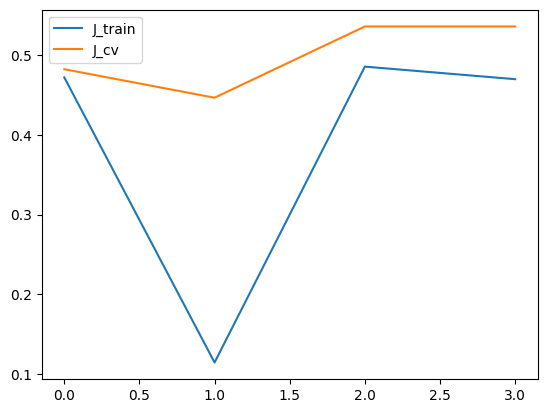

In [17]:
x_axis=np.arange(4)
plt.plot(x_axis,J_trains,label='J_train')
plt.plot(x_axis,J_cvs,label='J_cv')
plt.legend()
plt.show()